In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
#GET THE DATA
df = pd.read_csv('heart.csv')

In [3]:
#get the first 5 rows of data
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
#information for the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
# We must clean the NaN values, since we cannot train
# our model with unknown values.
# Luckily, there is nothing to clean.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

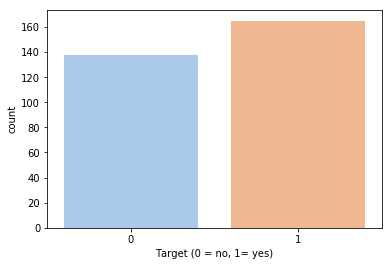

In [6]:
# First of all let's see how many zeros and ones do we have...
negative_target = len(df[df.target == 0])
positive_target = len(df[df.target == 1])
sns.countplot(x = "target", data = df, palette = "pastel")
plt.xlabel("Target (0 = no, 1= yes)")
plt.ylabel("count")
plt.show()

In [7]:
# It is a classification problem, and more precisely a BINARY CLASSIFICATION.
# we divide into two subsets: the training data and the testing data
# X are the explanatory variables, Y is the response variable ('target'):
X = df.drop('target', axis=1)  # everything except target.
Y = df['target']               # only target.

In [8]:
# Since the amount of data is not extremely large, we will use a small test_size (0.10-0.15).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15) 

In [9]:
# Firstly, let's take Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)

In [10]:
#train the model
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
#predict unseen data
rfc_predictions = rfc.predict(X_test)
test_error = accuracy_score(rfc_predictions, Y_test)
test_error

0.7391304347826086

Text(0.5,0,'Relative Importance')

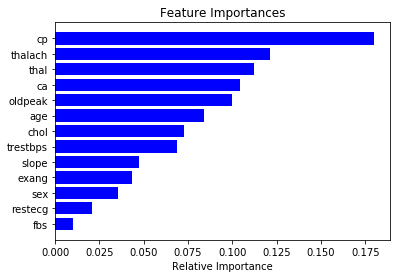

In [13]:
# get importances from RF
importances = rfc.feature_importances_

# then sort them descending
indices = np.argsort(importances)

# get the features from the original data set
features = df.columns[0:13]

# plot them with a horizontal bar chart
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')